# Lesson 19 -  Solutions
These exercises are to help you check your understanding during class. They will not be collected.

## Useful links
### Class notes
Link on NYU Classes or<br>
Tiny URL: https://tinyurl.com/S21FDTD

### Poll Everywhere
The following links are also on NYU Classes<br>
Login: https://www.polleverywhere.com/auth/saml/nyu_main<br>
Respond: https://pollev.com/clarkson<br>

## Part 1: Sampling

### Exercise 0 - Set up notebook
* Save your own copy of this notebook by using the menu opetion File > Save As. 
* Now, **refresh the page**. The red icon in the upper right should no longer be visible. 
- Run the code in the cells below to set the notebook up for use.

In [17]:
# load the dypyr and ggplot2 packages
library('dplyr')
library('ggplot2')

# Resizes all plots to 5 in by 4 in
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

## Exercise 1 - Primary colors
- Run the code in the cell below to construct the `primary_colors` data frame.
- Use `sample_n()` to randomly select two different colors. Do this at least three times so that you can see the randomness. 

`sample_n(DATAFRAME, NUMofSAMPLES, replace = TRUE/FALSE)`

In [37]:
primary_colors = data.frame( name = c('red', 'blue', 'yellow'))

In [40]:
sample_n(primary_colors, 2, replace = FALSE)
sample_n(primary_colors, 2, replace = FALSE)
sample_n(primary_colors, 2, replace = FALSE)

name
yellow
red


name
red
blue


name
blue
yellow


### Exercise 2 - Coin flip
- Run the code cell below to construct the `coin` data frame.
- Use `sample_n()` to simulate flipping the coin 100 times.
- What percentage of your coin flips were heads? Compare your result with at least two other people in your group.

In [28]:
coin <- data.frame(sides = c('heads', 'tails'))

In [45]:
flips <- sample_n(coin, 100, replace = TRUE)
head(flips, 4)

sides
heads
heads
heads
heads


In [44]:
# Strategy 1 mean of boolean
mean(flips$side == 'heads')

[1] 0.43

In [43]:
# Strategy 2 Filter
nrow(filter(flips, sides == 'heads')) / 100

[1] 0.43

## Part 2: Zoombinis!

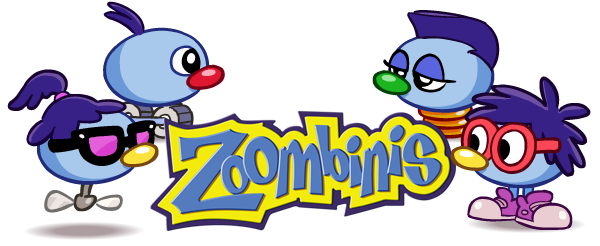

Zoombinis is a logic puzzle computer game that Prof. Clarkson played as a kid. It involved fanciful creatures called zoombinis. These creatures have four visual characteristics: 
- hair style: big poof, bob, ponytail, crew cut, small poof
- eye type: glasses, wide, shades, cyclops, sleepy
- nose color: green, red, orange, blue, purple
- and shoe type: propeller, spring, skates, sneakers, bike

The options for each are shown in the image below. Our Zoombinis also have an age (in years) and weight (in pounds). 

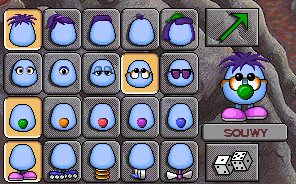

### Exercise 3 - Zoombini data

- Load the zoombinis data set.
- Use `head()` and `str()` to explore the zoombinis data set. 
- Use `unique()` to list the possible values for the eyes variable.

For the duration of this lesson, we will assume that the following data set contains information on **all** of the zoombinis in the universe. 

In [1]:
# Load the zoombinis data set
zoombinis <- read.csv('~/shared/data/zoombinis.csv')

In [2]:
str(zoombinis)

'data.frame':	150000 obs. of  7 variables:
 $ X     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hair  : Factor w/ 5 levels "big poof","bob",..: 1 1 1 2 1 4 1 1 1 1 ...
 $ nose  : Factor w/ 5 levels "blue","green",..: 2 2 5 3 5 1 4 3 5 3 ...
 $ shoes : Factor w/ 5 levels "bike","propeller",..: 2 2 2 2 2 5 2 3 3 4 ...
 $ age   : num  7.8 5.1 5.6 10.1 8.8 5.7 2.9 6.7 2.6 8.2 ...
 $ eyes  : Factor w/ 5 levels "cyclops","glasses",..: 2 2 2 2 5 3 1 1 1 2 ...
 $ weight: num  16.6 22.7 24.6 18.7 24.8 ...


In [26]:
unique(zoombinis$eyes)

[1] glasses wide    shades  cyclops sleepy 
Levels: cyclops glasses shades sleepy wide

### Exercise 4 - Average age

- Use `sample_n()` to sample 1,000 zoombinis. Call the resulting data frame `survey`.
- What is the average age of the zoombinis you surveyed? Compare your number with at least two others in your breakout room. Are the numbers the same?
- What is the average age of the zoombinis in the whole population? Is this number the same as the average age of the surveyed zoombinis?

`sample_n(DATAFRAME, NUMofSAMPLES, replace = TRUE/FALSE)`

In [25]:
survey <- sample_n(zoombinis, 1000, replace = FALSE)
mean(survey$age)
mean(zoombinis$age)

[1] 5.0559

[1] 5.145825

### Exercise 5 - Cyclops

- What proportion of your surveyed zoombinis are cyclops? Compare your number with at least two other people in your breakout room. Are the numbers the same?
- What proportion of the whole zoombini population are cyclops? Is the number the same as that for the surveyed zoombinis?


In [27]:
mean(survey$eyes == 'cyclops')
mean(zoombinis$eyes == 'cyclops')

[1] 0.193

[1] 0.19138

## Examples from notes

### Example distributions

In [18]:
example_data <- data.frame(
    bimodal = c(rnorm(400, 3, 1), rnorm(400, 9, 2))
)

m <- mean(example_data$bimodal)
sdev <- sd(example_data$bimodal)

example_data$normal = rnorm(800,m,sdev)
example_data$uniform = runif(800, 0, 2*m)

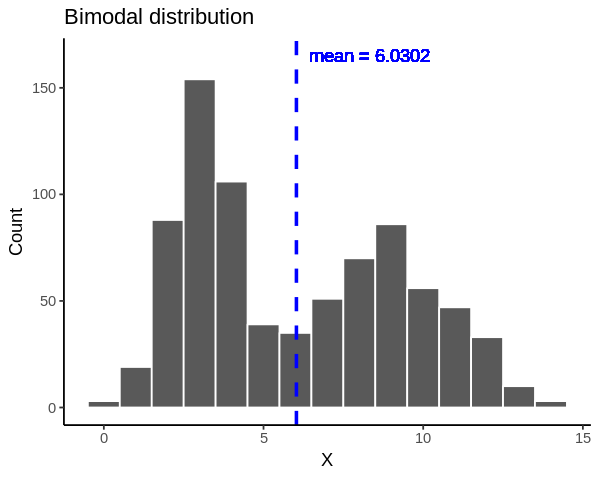

In [22]:
ggplot(example_data, aes(x=bimodal)) + 
    geom_histogram(color='white', binwidth=1) + 
    geom_vline(
        aes(xintercept=mean(bimodal)),
        color="blue", 
        linetype="dashed", 
        size=1
    ) +
    geom_text(
        aes(x=mean(bimodal), 
            label=paste0('mean = ', round(mean(bimodal),4)),
            y=165), 
        color="blue", 
        hjust = -.1
    ) +
    xlab('X') +
    ylab('Count') +
    labs(title='Bimodal distribution') +
    theme_classic()

In [42]:
totals

accuracy_type,Count
false negative,12
false positive,8
true negative,73
true positive,7


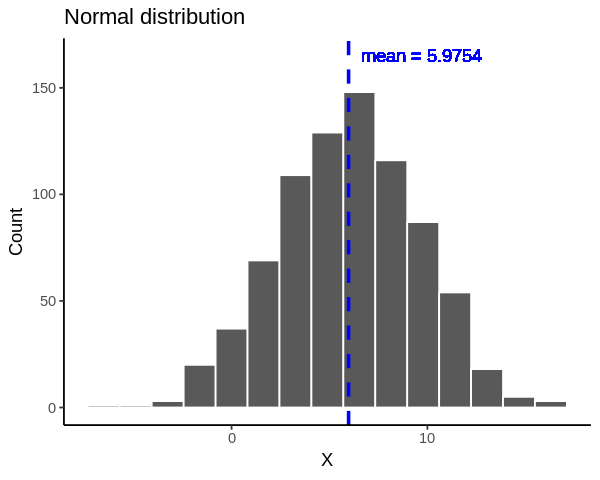

In [23]:
ggplot(example_data, aes(x=normal)) + 
    geom_histogram(color='white', bins=15) + 
    geom_vline(
        aes(xintercept=mean(normal)),
        color="blue", 
        linetype="dashed", 
        size=1
    ) +
    geom_text(
        aes(x=mean(normal), 
            label=paste0('mean = ', round(mean(normal),4)),
            y=165), 
        color="blue", 
        hjust = -.1
    ) +
    xlab('X') +
    ylab('Count') +
    labs(title='Normal distribution') +
    theme_classic()

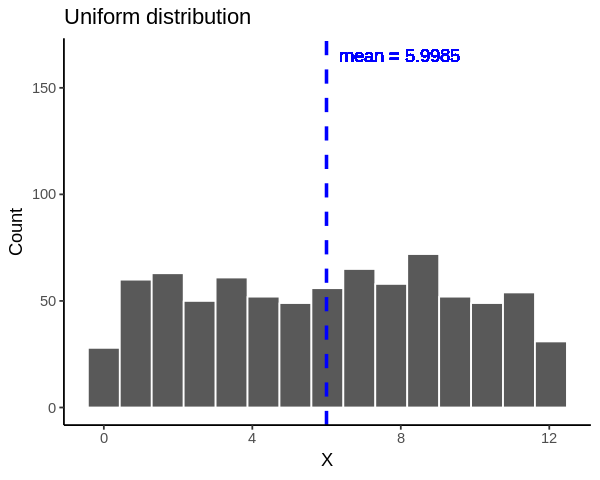

In [24]:
ggplot(example_data, aes(x=uniform)) + 
    geom_histogram(color='white', bins=15) + 
    geom_vline(
        aes(xintercept=mean(uniform)),
        color="blue", 
        linetype="dashed", 
        size=1
    ) +
    geom_text(
        aes(x=mean(uniform), 
            label=paste0('mean = ', round(mean(uniform),4)),
            y=165), 
        color="blue", 
        hjust = -.1
    ) +
    xlab('X') +
    ylab('Count') +
    labs(title='Uniform distribution') +
    theme_classic()